
### Non Negative Matrix Factorization 
Author: Biswash Bhusal <br>

Topic Modeling is an unsupervised method to discover topics based on their contents. Non-negative Matrix Factorization is a Linear model, that factors high-dimensional vectors into a low-dimensionality representation. Similar to Principal component analysis (PCA), NMF takes advantage of the fact that the vectors are non-negative.By factoring them into the lower-dimensional form, NMF forces the coefficients to also be non-negative.

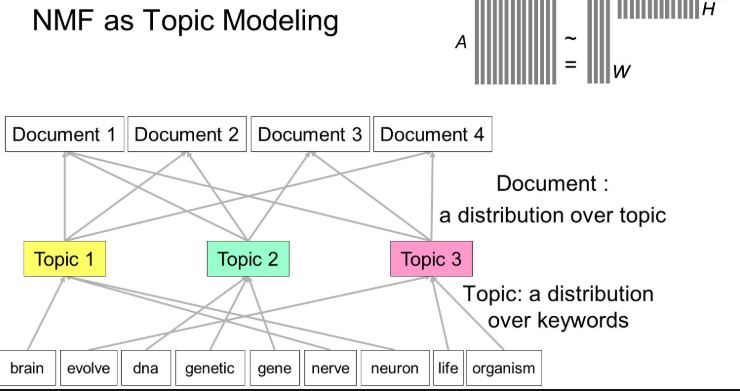

In [10]:
from IPython.display import Image
Image("C:\\Users\\Biswash\\phd_folder\\EE_6363\\project_6363\\nmf.JPG")


### Code for Above Analysis:

In [145]:
## Import Packages
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [12]:
### Read Yelp Dataset: Json Format
lines= []
num_total=50000
import json 
with open ('D:/PhD_IT/data_set/yelp_academic_dataset_review.json') as f:
    for line in f:
        if (len(lines) >= (num_total*2)):
            break
        lines.append(json.loads(line))

In [13]:
texts= [review['text'] for review in lines]
stars= [review['stars'] for review in lines]
dates= [review['date'] for review in lines]
review_id= [review['review_id'] for review in lines]
types= [review['type'] for review in lines]
#votes= [review['funny'] for review in lines]

In [14]:
print (texts[0:1])
print (stars[0:4])

["dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."]
[5, 2, 4, 4]


In [96]:
df = pd.DataFrame(dates, columns=['Dates'])
df['Review_id'] = pd.DataFrame(review_id)
df['Review'] = pd.DataFrame(texts)
df['Stars'] = pd.DataFrame(stars)

In [97]:
df.head()

,Dates,Review_id,Review,Stars
0,2007-05-17,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,5
1,2010-03-22,RF6UnRTtG7tWMcrO2GEoAg,"Unfortunately, the frustration of being Dr. Go...",2
2,2012-02-14,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,4
3,2012-03-02,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,4
4,2012-05-15,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,4


In [98]:
print(len(df))

100000


In [99]:
#let's check out a sample review
df.Review[10]

'All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!!  The "Wet Cajun" are by the best & most popular.  I also like the seasoned salt wings.  Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well.  This place is truly a Yinzer\'s dream!!  "Pittsburgh Dad" would love this place n\'at!!'

In [100]:
##checking for nulls
df.isnull().any()

Dates        False
Review_id    False
Review       False
Stars        False
dtype: bool

In [101]:
df.Stars.unique()

array([5, 2, 4, 1, 3], dtype=int64)

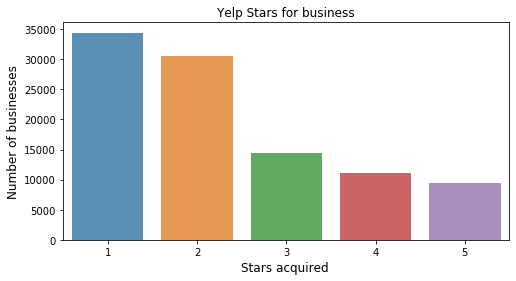

In [102]:
x=df['Stars'].value_counts()
y=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(y.index, x.values, alpha=0.8)
plt.title("Yelp Stars for business")
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Stars acquired ', fontsize=12);

In [103]:
### convert rating as sentiment proxy
df['labels']=df['Stars'].apply(lambda x: -1 if x < 3 else (0 if x==3 else 1))

In [104]:
df.loc[df['Stars'] == 4].head(5)

,Dates,Review_id,Review,Stars,labels
2,2012-02-14,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,4,1
3,2012-03-02,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,4,1
4,2012-05-15,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,4,1
13,2014-11-28,mjCJR33jvUNt41iJCxDU_g,Cold cheap beer. Good bar food. Good service. ...,4,1
17,2013-08-16,iS34GJhMkkt9kCoTJLYEwA,Before I finally made it over to this range I ...,4,1


In [105]:
## Drop the first column
df=df.drop(df.columns[0], axis=1)

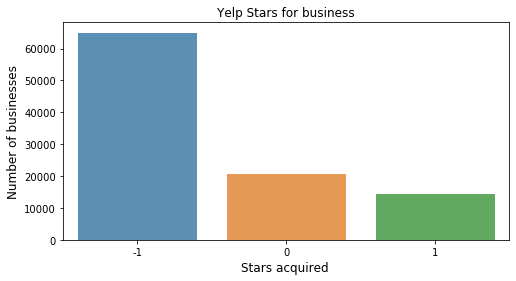

In [106]:
x=df['labels'].value_counts()
y=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(y.index, x.values, alpha=0.8)
plt.title("Yelp Stars for business")
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Stars acquired ', fontsize=12);

### Clean the Text (PreProcessing)

In [138]:
import re
def clean_corpus(nlp):
    words= nlp.lower()
    mytext=re.sub(r'[^a-zA-Z0-9\.]', ' ',words)
    mytext=re.sub(r' +', ' ', mytext)
    return mytext.strip()
    
df['review_clean'] = df.Review.apply(clean_corpus)

"""
import re
def clean_yelp_corpus(nlp):
    mytext = re.sub(r"@\w+", "", nlp) # Remove handle if any present 
    mytext = re.sub(r"\d", "", mytext) # Remove numbers
    mytext = re.sub(r"_+", "", mytext) # Remove consecutive underscores
    mytext = re.sub(r"#+", "", mytext) # Remove consecutive hash
    mytext = mytext.lower() # Transform to lower case
    
    return mytext.strip()

df['review_clean'] = df.Review.apply(clean_yelp_corpus)  

### alternative
import re
def clean_str(string):

    Tokenization/string cleaning for dataset
    Every dataset is lower cased except

    string = re.sub(r"\\", "", string)    
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

"""

'\nimport re\ndef clean_yelp_corpus(nlp):\n    mytext = re.sub(r"@\\w+", "", nlp) # Remove handle if any present \n    mytext = re.sub(r"\\d", "", mytext) # Remove numbers\n    mytext = re.sub(r"_+", "", mytext) # Remove consecutive underscores\n    mytext = re.sub(r"#+", "", mytext) # Remove consecutive hash\n    mytext = mytext.lower() # Transform to lower case\n    \n    return mytext.strip()\n\ndf[\'review_clean\'] = df.Review.apply(clean_yelp_corpus)  \n\n'

In [139]:
### Drop redundant columns
reviews_df=df.drop(['Stars'],axis=1)
reviews_df=reviews_df.drop(['Review'],axis=1)

In [140]:
reviews_df.head(1)

,Review_id,labels,review_clean
0,15SdjuK7DmYqUAj6rjGowg,1,dr. goldberg offers everything i look for in a...


In [141]:
reviews_df.review_clean[10]

'all the food is great here. but the best thing they have is their wings. their wings are simply fantastic the wet cajun are by the best most popular. i also like the seasoned salt wings. wing night is monday wednesday night 0.75 whole wings the dining area is nice. very family friendly the bar is very nice is well. this place is truly a yinzer s dream pittsburgh dad would love this place n at'

In [142]:
reviews_df['labels'].unique()

array([ 1, -1,  0], dtype=int64)

In [143]:
reviews_df.columns

Index(['Review_id', 'labels', 'review_clean'], dtype='object')

Now, we will tokenize the 'text' using the following line of code. RegexTokenizer is a tokenizer that splits a string using regular expression, which matches either the tokens or the seperators between the tokens. More detail on RegexTokenizer: http://www.nltk.org/_modules/nltk/tokenize/regexp.html

In [165]:
def custom_tokenize(text):
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return nltk.word_tokenize(text)
reviews_df['tokenized_review_clean'] = reviews_df.review_clean.apply(custom_tokenize)

"""
# Alternative 
reviews_df['review_clean'].dropna(inplace=True)
tokens = reviews_df['review_clean'].apply(nltk.word_tokenize)
"""

The text to be tokenized is a None type. Defaulting to blank string.


In [166]:
reviews_df['tokenized_review_clean'].head()

0    [dr., goldberg, offers, everything, i, look, f...
1    [unfortunately, the, frustration, of, being, d...
2    [dr., goldberg, has, been, my, doctor, for, ye...
3    [been, going, to, dr., goldberg, for, over, 10...
4    [got, a, letter, in, the, mail, last, week, th...
Name: tokenized_review_clean, dtype: object

In [179]:
# from nltk.tokenize import RegexpTokenizer
# preprocessed = [" ".join(RegexpTokenizer(r'\w+').tokenize(reviews_df.tokenized_review_clean[idx] for idx in reviews_df.index))]

In [156]:
# from nltk.tokenize import RegexpTokenizer
# preprocessed = [" ".join(RegexpTokenizer(r'\w+').tokenize(reviews_df.review_clean[idx] for idx in reviews_df.index))]

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

custom_stop_words = ["mm", "um", "oh", "ah", "ll", "yeah", "thank", "ve"]
my_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

vectorizer = TfidfVectorizer(min_df = 1, ngram_range= (1,1), stop_words= my_stop_words)
tfidf = vectorizer.fit_transform(reviews_df['review_clean'].values)
print ("Created document term matrix of size {}, {}".format(tfidf.shape[0], tfidf.shape[1]))

Created document term matrix of size 100000, 75104


In [184]:
from sklearn import decomposition
nmf = decomposition.NMF(init = 'nndsvd', n_components = 5, max_iter = 300)
W = nmf.fit_transform(tfidf)
H = nmf.components_
print ("Generated factor W of size {} and factor H of size {}".format(str(W.shape), str(H.shape)))
feature_names = vectorizer.get_feature_names()
n_top_words = 10
## print top words in each topic

for topic_idx , topic in enumerate(H):
    print(('Topic #%d'% topic_idx))
    print((" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words -1: -1]])))
    print ()

Generated factor W of size (100000, 5) and factor H of size (5, 75104)
Topic #0
good food chicken lunch restaurant ordered really menu salad sauce

Topic #1
great service food friendly staff atmosphere prices excellent awesome selection

Topic #2
time just like don did didn got went store minutes

Topic #3
pizza crust wings cheese sauce good best delivery toppings pepperoni

Topic #4
place love best sushi amazing awesome friendly bar favorite staff



In [185]:
print (H)

[[2.74028188e-02 0.00000000e+00 0.00000000e+00 ... 1.74942429e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.06491752e-01 2.38240298e-02 2.31695523e-04 ... 7.34943279e-05
  1.09965162e-04 8.18187634e-05]
 [6.98965908e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.82276682e-04]]


In [186]:
H.shape

(5, 75104)

In [209]:
### Create Pandas Dataframe for the topics 
import pandas as pd
mydf= pd.DataFrame({"feature_name": feature_names})
for topic_idx, topic in enumerate(H):
    mydf["topic_" + str(topic_idx)] = topic
    
mylist = list(mydf.itertuples())
mywords_topic1 = []
mywords_topic2 = []
mywords_topic3 = []
mywords_topic4 = []
mywords_topic5 = []

for order_id, key, num1, num2, num3, num4, num5 in mylist:
    mywords_topic1.append((key, num1))
    mywords_topic2.append((key, num2))
    mywords_topic3.append((key, num3))
    mywords_topic4.append((key, num4))
    mywords_topic5.append((key, num5))
mywords_topic1 = sorted(mywords_topic1, key = lambda myword: myword[1], reverse = True)
mywords_topic2 = sorted(mywords_topic2, key = lambda myword: myword[1], reverse = True)
mywords_topic3 = sorted(mywords_topic3, key = lambda myword: myword[1], reverse = True)
mywords_topic4 = sorted(mywords_topic4, key = lambda myword: myword[1], reverse = True)
mywords_topic5 = sorted(mywords_topic5, key = lambda myword: myword[1], reverse = True)

In [210]:
mywords_topic1[0:5]

[('good', 2.6619755477278195),
 ('food', 2.0661879987677367),
 ('chicken', 1.264774909625242),
 ('lunch', 0.8439673678928998),
 ('restaurant', 0.7583979105699402)]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def word_cloud(*mywords_topic):
    n_row = len(mywords_topic)
    n_col = 1
    plt.figure(figsize=(n_col*5*1.618, n_row*5))
    wordcloud = WordCloud()
    i = 0
    for word in mywords_topic:
        wordcloud.fit_words(word)
        plt.suplot(n_row, n_col, i+1)
        plt.title('Topic %s'%str(i+1), size = 16)
        plt.imshow(wordcloud)
        plt.axis("off")
        i += 1
        
myarg = (mywords_topic1, mywords_topic2, mywords_topic3, mywords_topic4, mywords_topic5)

word_cloud(*myarg)

### Latent Dirichlet Allocation

In [213]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(reviews_df['review_clean'].values)

In [216]:
from sklearn.decomposition import LatentDirichletAllocation

In [219]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation( n_components=10, learning_method="batch",
                                max_iter=2, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

In [220]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [221]:
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

In [223]:
import mglearn

In [224]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
ordered       chicken       he            pizza         love          
cheese        he            pizza         salad         coffee        
menu          know          after         people        staff         
restaurant    its           car           cheese        store         
order         got           chicken       much          than          
delicious     ever          did           lunch         friendly      
us            never         told          two           better        
came          think         got           than          never         
little        pretty        she           over          got           
got           than          order         night         going         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
menu

In [227]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=2, random_state=0)
document_topics100 = lda100.fit_transform(X)


In [229]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
bar           restaurant    pretty        than          hotel         
she           wine          menu          friendly      room          
see           pasta         beer          definitely    rooms         
friendly      excellent     friendly      staff         restaurant    
little        shrimp        decent        fresh         night         
small         love          bar           better        day           
people        than          breakfast     never         many          
much          delicious     much          delicious     most          
didn          table         staff         order         could         
love          atmosphere    better        love          stay          
selection     lobster       chicken       people        over          
looking       menu          excellent     little        years         
think 

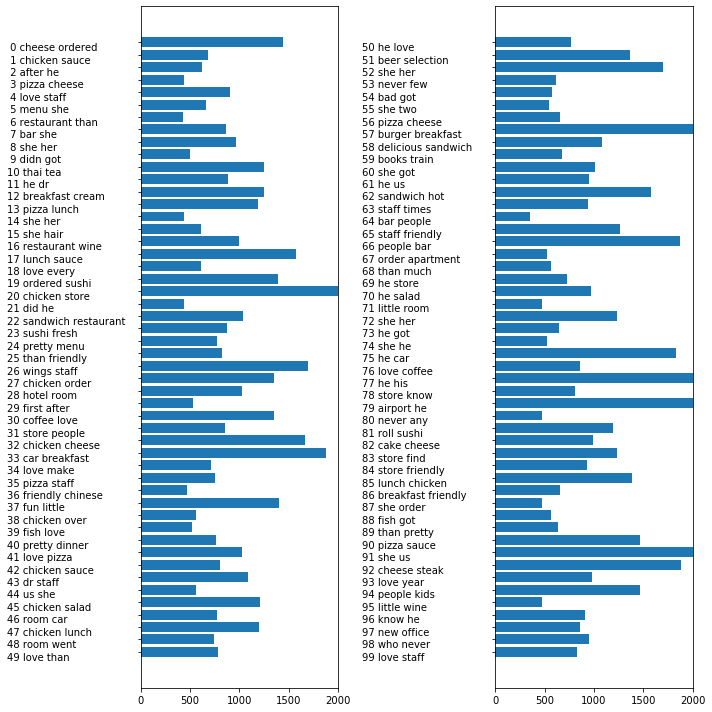

In [243]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

Reference : Amueller Github code 